In [52]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [53]:
file_name = "syn_3"
attribute_key = "property_lt_20"

In [54]:
case_attribute_key = f'case:{attribute_key}'
case_id_key = "case:concept:name"

# df = pm4py.read_xes(f'../logs/{file_name}.xes')
df = pd.read_csv(f'../logs/{file_name}.{attribute_key}.csv')
df["time:timestamp"] = pd.to_datetime(df['time:timestamp'])
df["case:concept:name"] = df['case:concept:name'].astype(str)
df["concept:name"] = df['concept:name'].astype(str)

df = df.dropna(subset=[case_attribute_key]).reset_index() # filter empty rows

In [55]:
attribute_values = pm4py.get_trace_attribute_values(df, attribute_key)
sorted_attribute_values = sorted([ float(k) for k in attribute_values.keys() ])

In [56]:
import numpy as np

t = time.time()

k = 0

for v in sorted_attribute_values:
    k = k + attribute_values[v]
    if (k >= sum(attribute_values.values()) // 2):
        median = v
        break


medians = [ 1 if pivot == median else 0 for pivot in tqdm(sorted_attribute_values[1:]) ]

t = time.time() - t

time.sleep(1)

print(f"time elapsed: {t}")

100%|██████████| 100/100 [00:00<00:00, 2723574.03it/s]


time elapsed: 0.0012900829315185547


In [57]:
median

49.0

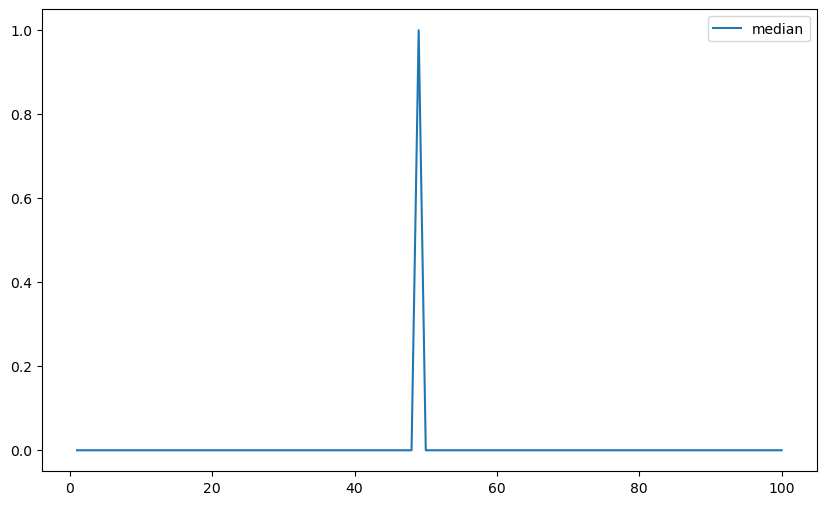

In [58]:
plt.figure(figsize=(10,6))

# plot mmlngld
plt.plot(sorted_attribute_values[1:], medians, label="median")

plt.legend()
plt.savefig(f"out.median.{file_name}.{attribute_key}.png", bbox_inches="tight")

In [59]:
pd.DataFrame({"median": medians}).to_csv(f"out.median.{file_name}.{attribute_key}.csv", index=False, header=False)